# Degree Distributions

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')
from libs.handlers import utils
from libs.handlers import viz
from libs.handlers import io
from libs.handlers import validations as val

In [2]:
DATA = '../data/synthetic'
FN_RESULTS = val.validate_path("../results/distributions.csv")
PLOTS = val.validate_path("../plots")

## Graph generation

In [3]:
df_results = io.read_csv(FN_RESULTS, allow_empty=True)
is_new = utils.dataframe_is_empty(df_results)

In [4]:
print(f"Data folder: {DATA}")
print(f"Output: {FN_RESULTS} ({'new' if is_new else 'already exists'})")
print(f"Plots folder: {PLOTS}")

Data folder: ../data/synthetic
Output: ../results/distributions.csv (new)
Plots folder: ../plots


### PAH (BA Homophily)
Undirected networks with **P**referential **A**ttachment and **H**omophily

In [7]:
if is_new:
    tmp = utils.load_distributions(DATA, 'PAH')
    df_results = utils.concat_dataframe(df_results, tmp)

### PATCH
Undirected networks with **P**referential **A**ttachment, **T**riadic **C**losure, and **H**omophily

In [8]:
if is_new:
    tmp = utils.load_distributions(DATA, 'PATCH')
    df_results = utils.concat_dataframe(df_results, tmp)

### DPAH
**D**irected networks with **P**referential **A**ttachment and **H**omophily

In [9]:
if is_new:
    tmp = utils.load_distributions(DATA, 'DPAH')
    df_results = utils.concat_dataframe(df_results, tmp)

### DPA
**D**irected networks with **P**referential **A**ttachment

In [10]:
if is_new:
    tmp = utils.load_distributions(DATA, 'DPA')
    df_results = utils.concat_dataframe(df_results, tmp)

### DH
**D**irected networks with **H**omophily

In [11]:
if is_new:
    tmp = utils.load_distributions(DATA, 'DH')
    df_results = utils.concat_dataframe(df_results, tmp)

## Results

In [12]:
if is_new:
    io.to_csv(df_results, fn=FN_RESULTS, verbose=True)

[INFO] ../results/distributions.csv saved!


In [13]:
df_results.shape

(3071000, 18)

In [14]:
df_results.sample(5)

,name,N,m,fm,h_MM,h_mm,seed,network_id,node,label,degree,indegree,outdegree,pagerank,tc,d,plo_M,plo_m
2874570,PATCH,1000,2.0,0.1,0.5,0.1,619490896,2270,599,0,3.0,NaN,NaN,0.000795,0.8,NaN,NaN,NaN
88628,PAH,1000,2.0,0.4,0.3,0.4,915442411,89,868,1,2.0,NaN,NaN,0.000557,NaN,NaN,NaN,NaN
2895652,PATCH,1000,2.0,0.2,0.5,0.6,4005001425,2291,862,0,2.0,NaN,NaN,0.000524,0.2,NaN,NaN,NaN
766946,PATCH,1000,2.0,0.5,0.3,0.6,4282093583,162,502,1,2.0,NaN,NaN,0.000567,0.2,NaN,NaN,NaN
2810481,PATCH,1000,2.0,0.2,0.5,0.4,4079436959,2206,128,0,11.0,NaN,NaN,0.002569,0.2,NaN,NaN,NaN


## Plots

In [25]:
q = "fm==0.1 and ((h_mm==0.0 and h_MM==0.0) or name=='DPA') and (m not in @nan or name not in ['PAH','PATCH']) and (tc not in @nan or plo_M not in @nan or d not in @nan or name in ['PAH','PATCH'])"
data = utils.flatten_dataframe_by_metric(df_results.query(q))

In [26]:
kind = 'ecdf'

[INFO] ../plots/distribution_across_generators_ecdf_d0.01_fm0.1_hMM0.0_hmm0.0_tc0.2_ploM1.5_plom1.5.pdf saved!


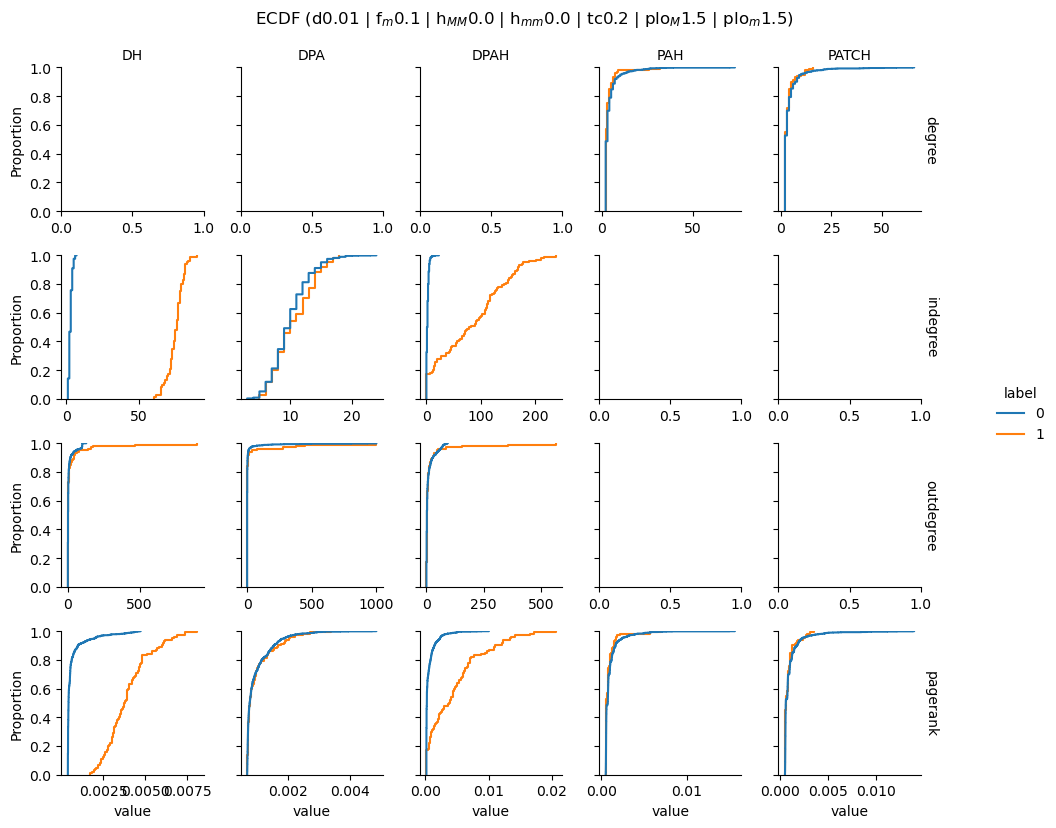

In [27]:
viz.plot_distributions_across_models(data, kind=kind, d=0.01, fm=0.1, h_MM=0.0, h_mm=0.0, tc=0.2, plo_M=1.5, plo_m=1.5, output=PLOTS)